# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="-MIDS---w261-Machine-Learning-At-Scale--1" href="#-MIDS---w261-Machine-Learning-At-Scale-"><span class="toc-item-num">1&nbsp;&nbsp;</span> MIDS - w261 Machine Learning At Scale </a></div><div class="lev2 toc-item"><a data-toc-modified-id="Assignment---HW10-11" href="#Assignment---HW10"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assignment - HW10</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Instructions-2" href="#Instructions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instructions</a></div><div class="lev2 toc-item"><a data-toc-modified-id="IMPORTANT-21" href="#IMPORTANT"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>IMPORTANT</a></div><div class="lev3 toc-item"><a data-toc-modified-id="===-INSTRUCTIONS-for-SUBMISSIONS-===-211" href="#===-INSTRUCTIONS-for-SUBMISSIONS-==="><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>=== INSTRUCTIONS for SUBMISSIONS ===</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Useful-References-3" href="#Useful-References"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful References</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW-Problems-4" href="#HW-Problems"><span class="toc-item-num">4&nbsp;&nbsp;</span>HW Problems</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.0:-Short-answer-questions-5" href="#HW10.0:-Short-answer-questions"><span class="toc-item-num">5&nbsp;&nbsp;</span>HW10.0: Short answer questions</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.1-WordCount-plus-sorting-6" href="#HW10.1-WordCount-plus-sorting"><span class="toc-item-num">6&nbsp;&nbsp;</span>HW10.1 WordCount plus sorting</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.1.1-7" href="#HW10.1.1"><span class="toc-item-num">7&nbsp;&nbsp;</span>HW10.1.1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.2:-MLlib-centric-KMeans-8" href="#HW10.2:-MLlib-centric-KMeans"><span class="toc-item-num">8&nbsp;&nbsp;</span>HW10.2: MLlib-centric KMeans</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.3:-Homegrown-KMeans-in-Spark-9" href="#HW10.3:-Homegrown-KMeans-in-Spark"><span class="toc-item-num">9&nbsp;&nbsp;</span>HW10.3: Homegrown KMeans in Spark</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.4:-KMeans-Experiments-10" href="#HW10.4:-KMeans-Experiments"><span class="toc-item-num">10&nbsp;&nbsp;</span>HW10.4: KMeans Experiments</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.4.1:-Making-Homegrown-KMeans-more-efficient-11" href="#HW10.4.1:-Making-Homegrown-KMeans-more-efficient"><span class="toc-item-num">11&nbsp;&nbsp;</span>HW10.4.1: Making Homegrown KMeans more efficient</a></div><div class="lev3 toc-item"><a data-toc-modified-id="HINT:-have-a-look-at--this-linear-regression-notebook-1101" href="#HINT:-have-a-look-at--this-linear-regression-notebook"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span>HINT: have a look at  <a target="_blank" href="http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb">this linear regression notebook</a></a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.5:-OPTIONAL-Weighted-KMeans-12" href="#HW10.5:-OPTIONAL-Weighted-KMeans"><span class="toc-item-num">12&nbsp;&nbsp;</span>HW10.5: OPTIONAL Weighted KMeans</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.6-OPTIONAL-Linear-Regression-13" href="#HW10.6-OPTIONAL-Linear-Regression"><span class="toc-item-num">13&nbsp;&nbsp;</span>HW10.6 OPTIONAL Linear Regression</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.6.1-OPTIONAL-Linear-Regression-14" href="#HW10.6.1-OPTIONAL-Linear-Regression"><span class="toc-item-num">14&nbsp;&nbsp;</span>HW10.6.1 OPTIONAL Linear Regression</a></div><div class="lev1 toc-item"><a data-toc-modified-id="HW10.7-OPTIONAL-Error-surfaces-15" href="#HW10.7-OPTIONAL-Error-surfaces"><span class="toc-item-num">15&nbsp;&nbsp;</span>HW10.7 OPTIONAL Error surfaces</a></div>

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

plt.style.use('seaborn-white')

%reload_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession
app_name = "Notebook_HW10"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [3]:
spark

In [4]:
sc

<SparkContext master=local[*] appName=Notebook_HW10>

In [ ]:
import random
num_samples = 10000000

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

def pi_calc(count_in, n):
    return 4 * float(count_in) / float(n)

In [ ]:
%%time
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
print pi_calc(count, num_samples)

In [ ]:
%%time
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import udf
inside_udf = udf(inside, BooleanType())

data = spark.range(0, num_samples)
count = data.withColumn("inside", inside_udf("id")).where("inside = True").count()
# print data.take(1)
print pi_calc(count, num_samples)

In [ ]:
#RDD mapper
rdd = sc.parallelize([1,2,3,3])
rdd.map(lambda x:  x + 1).collect()
#returns [2, 3, 4, 4]

In [ ]:
#RDD flatmap ranges of integer ranges
rdd = sc.parallelize([1,2,3,3])
rdd.flatMap(lambda x:  range(x, 8)).collect()
rdd.flatMap(lambda x:  range(x, 10)).distinct().collect()
#returns [8, 1, 9, 2, 3, 4, 5, 6, 7]

In [ ]:
lines = sc.parallelize(["Data line 1", "Mining line 2", "data line 3", "Data line 4", "Data Mining line 5"])
pairs = lines.map(lambda x: (x.split(" ")[0], x))  #first word and the original line
pairs.collect()

In [ ]:
def filterTerm(line):
    if 'data' in line[1]:
        return (line[0])
    
result = pairs.filter(filterTerm)
result.collect()

In [ ]:
lines = sc.parallelize(["Data line 1", "Mining line 2", "data line 3", "Data line 4", "Data Mining line 5"])
counts = lines.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
        
counts.collect()

In [ ]:
# a more efficent word counter (less network communication)
lines = sc.parallelize(["Data line 1", "Mining line 2", "data line 3", "Data line 4", "Data Mining line 5"])
def emitWordCounts(line):
    wordCounts = []
    for w in line.split(" "):
        wordCounts.append((w, 1))  #could hash and do an in-memory combiner to be more efficient
    return (wordCounts)
    
counts = lines.flatMap(emitWordCounts) \
             .reduceByKey(lambda a, b: a + b)
counts.collect()

<h1> MIDS - w261 Machine Learning At Scale </h1>
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

<h2>Assignment - HW10</h2>


---
__Name:__  *Your Name Goes Here*   
__Class:__ MIDS w261 (Section *Your Section Goes Here*, e.g., Fall 2016 Group 1)     
__Email:__  *Your UC Berkeley Email Goes Here*@iSchool.Berkeley.edu     
__StudentId__  123457    __End of StudentId__     
__Week:__   10

__NOTE:__ please replace `1234567` with your student id above      
__Due Time:__ HW is due the Tuesday of the following week by 8AM (West coast time). I.e., Tuesday, April 4, 2017 in the case of this homework. 

# Instructions

MIDS UC Berkeley, Machine Learning at Scale   
DATSCIW261 ASSIGNMENT #10

Version 2017-3-24 


## IMPORTANT

This homework can be completed locally on your computer. 

### === INSTRUCTIONS for SUBMISSIONS ===   
Follow the instructions for submissions carefully.

Each student has a `HW-<user>` repository for all assignments.   

Click this link to enable you to create a github repo within the MIDS261 Classroom:   
https://classroom.github.com/assignment-invitations/3b1d6c8e58351209f9dd865537111ff8   
and follow the instructions to create a HW repo.

Push the following to your HW github repo into the master branch:
* Your local HW6 directory. Your repo file structure should look like this:

```
HW-<user>
    --HW3
       |__MIDS-W261-HW-03-<Student_id>.ipynb
       |__MIDS-W261-HW-03-<Student_id>.pdf
       |__some other hw3 file
    --HW4
       |__MIDS-W261-HW-04-<Student_id>.ipynb
       |__MIDS-W261-HW-04-<Student_id>.pdf
       |__some other hw4 file
    etc..
```    

# Useful References

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

# HW Problems

# HW10.0: Short answer questions


__What is Apache Spark and how is it different to Apache Hadoop? __

> * Both are frameworks to do distributed computing
> * Spark improves on Hadoop by moving more computations in memory (vs disk or over networks)
> * Hadoop replicates data on disks for fault tolerance, Spark uses resilient distributed dataset (RDD)
> * Spark can be 10-100 times faster than Hadoop MapReduce
> * Spark has libraries for SQL, Machine Learning, and interactive shells


__Fill in the blanks:__  
<hr>
   
__Spark API consists of interfaces to develop applications based on it in Java, Scala, Python, R languages (list languages). __

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or YARN in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

> RDDs (Resilient Distributed Datasets) are the data storage model used in Apache Spark framework. It's immutable (read-only) and partitioned collection of records that can be stored in the volatile memory or in a persistent storage. RDDs are fault-tolerant, parallel data structures that let users explicitly persist intermediate results in memory, control their partitioning to optimize data placement, and manipulate them using a rich set of operators.

In [ ]:
rdd = sc.textFile("data.csv")
rdd.first()

# HW10.1 WordCount plus sorting

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Please refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [ ]:
%%writefile wordcount.txt
hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

In [5]:
rdd = sc.textFile('wordcount.txt')
rdd.collect()

[u'hello hi hi hallo',
 u'bonjour hola hi ciao',
 u'nihao konnichiwa ola',
 u'hola nihao hello']

In [6]:
lines = sc.textFile('wordcount.txt')

def emitWordCounts(line):
    wordCounts = []
    for w in line.split(" "):
        wordCounts.append((w, 1))  #could hash and do an in-memory combiner to be more efficient
    return (wordCounts)
    
counts = lines.flatMap(emitWordCounts) \
            .reduceByKey(lambda a, b: a + b) \
            .sortByKey()
            
output = counts.map(lambda (k,v): (v,k)).sortByKey(False).take(20)
for (count, word) in output:
    print "{}: {}".format(count, word)

3: hi
2: hello
2: hola
2: nihao
1: bonjour
1: ciao
1: hallo
1: konnichiwa
1: ola


In [ ]:
lines = sc.textFile('wordcount.txt')


counts = lines.flatMap(lambda line: line.split(' ')) \
            .map(lambda word: ('word', 1)) \
            .reduceByKey(lambda a, b: a + b)

counts.collect()

In [8]:
# Normalize text
def normalizeWords(text):
    return re.compile(r'[\W]+', re.UNICODE).split(text)



# Count each word in line
def emitWordCounts(line):
    wordCounts = []
    for w in line.split(" "):
        if w: # Ignore empty string
            wordCounts.append((w, 1))  #could hash and do an in-memory combiner to be more efficient
    return (wordCounts)

input = sc.textFile('/media/notebooks/main/HW10/MIDS-W261-HW-10-TEMPLATE.ipynb')
lines = input.flatMap(normalizeWords)

counts = lines.flatMap(emitWordCounts) \
            .reduceByKey(lambda a, b: a + b) \
            .takeOrdered(20, key = lambda x: -x[1])
            
#output = counts.map(lambda (k,v): (v,k)).sortByKey(False).take(20)
for (count, word) in counts:
    print "{}: \t {}".format(count, word)

#print counts

n: 	 231
the: 	 77
a: 	 73
toc: 	 59
HW10: 	 55
1: 	 45
span: 	 40
div: 	 38
nbsp: 	 38
item: 	 38
class: 	 38
and: 	 37
of: 	 36
metadata: 	 35
data: 	 34
cell_type: 	 33
in: 	 33
source: 	 33
10: 	 30
KMeans: 	 26


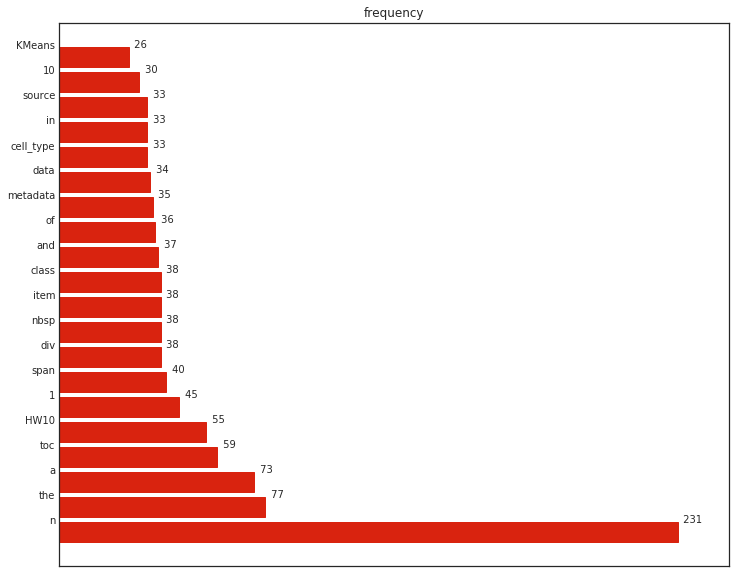

In [9]:

# this is general purpose code to produce a barplot from a list like
# See Unit test below for an example use case

def myBarPlot(dimensionMeasureList, measureStr):
    """
    Show a bar chart of the total measure per item
    """
    items = [d[0] for d in dimensionMeasureList]
    minutes  = [d[1] for d in dimensionMeasureList]
    index    = list(xrange(len(items)))

    
    fig, axe = plt.subplots(figsize=(12,10))
    
    bars = axe.barh(index, minutes)

    # Add the total measure (e.g., wordcount) to the right
    for idx, air, min in zip(index, items, minutes):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], items)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()


#  Unit test for myBarPlot
myBarPlot(counts, 'frequency')


In [10]:
counts = lines.flatMap(emitWordCounts) \
            .reduceByKey(lambda a, b: a + b) \
            .takeOrdered(10, key = lambda x: x[1])
            
#output = counts.map(lambda (k,v): (v,k)).sortByKey(False).take(20)
for (count, word) in counts:
    print "{}: \t {}".format(count, word)

tibs: 	 1
sameModel: 	 1
Lead: 	 1
vgmpivsi4rvqz0s: 	 1
my3tnhxx7fr5qs0: 	 1
consists: 	 1
Business: 	 1
norm: 	 1
bringing: 	 1
carefully: 	 1


# HW10.1.1

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


In [11]:
# Normalize text
def normalizeWords(text):
    return re.compile(r'[\W]+', re.UNICODE).split(text)

# Count each word in line
def emitWordCounts(line):
    wordCounts = []
    for w in line.split(" "):
        if w and w[0].islower():
            wordCounts.append((w, 1))  #could hash and do an in-memory combiner to be more efficient
    return (wordCounts)

#input = sc.textFile('/media/notebooks/main/HW10/MIDS-W261-HW-10-TEMPLATE.ipynb')
input = sc.textFile('MIDS-MLS-HW-10.txt')
lines = input.flatMap(normalizeWords)

counts = lines.flatMap(emitWordCounts) \
            .reduceByKey(lambda a, b: a + b) \
            .takeOrdered(20, key = lambda x: -x[1])
            
#output = counts.map(lambda (k,v): (v,k)).sortByKey(False).take(20)
for (count, word) in counts:
    print "{}: \t {}".format(count, word)

the: 	 44
and: 	 23
of: 	 17
in: 	 17
a: 	 12
data: 	 11
code: 	 10
to: 	 9
clusters: 	 9
for: 	 7
with: 	 7
is: 	 7
on: 	 7
s: 	 6
x: 	 6
your: 	 6
iterations: 	 5
from: 	 5
this: 	 5
as: 	 5


# HW10.2: MLlib-centric KMeans

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [ ]:
!rm -rf myModelPath

In [12]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

data = sc.textFile('kmeans_data.txt')  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print 'Centroids:'
for centroid in clusters.centers:
    print centroid
print 'Within Set Sum of Squared Error = ' + str(WSSSE)

# Save and load model
#clusters.save(sc, "myModelPath")
#sameModel = KMeansModel.load(sc, "myModelPath")



Centroids:
[ 9.1  9.1  9.1]
[ 0.1  0.1  0.1]
Within Set Sum of Squared Error = 0.692820323028


# HW10.3: Homegrown KMeans in Spark 

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



In [13]:
 %matplotlib inline
import numpy as np
import pylab 
import json

size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

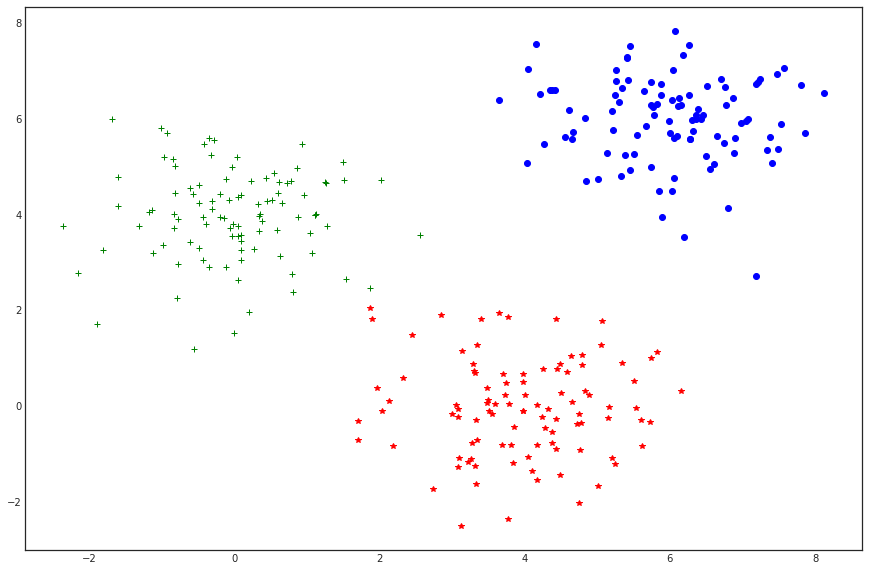

In [14]:
plt.figure(figsize=(15,10))
plt.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
plt.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
plt.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')

plt.show()

In [15]:
#plot centroids and data points for each iteration
def plot_iteration(k, iteration, means):
    plt.figure(figsize=(15,10))
    plt.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    plt.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    plt.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    plt.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    plt.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    plt.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    plt.title("Clusters with k = {} and iterations = {}".format(k, iteration))
    plt.show()

Iteration: 1
Centroids: 
[ 3.98555185 -0.08303659]
[ 0.02606086  3.93311573]
[ 5.990326    5.97262298]
Within Set Sum of Squared Error = 354.318947642


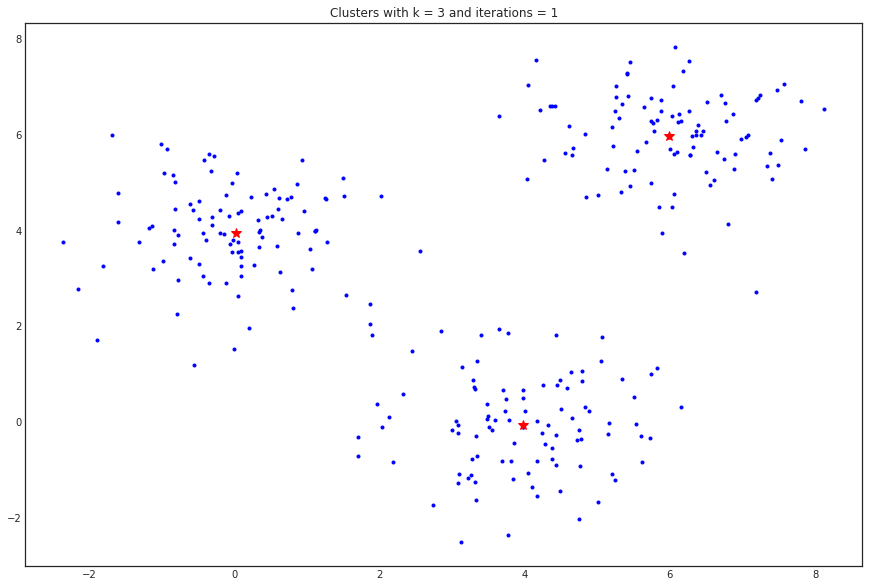

354.318947642
Iteration: 10
Centroids: 
[ 0.00754038  3.95411625]
[ 3.96445162 -0.06389417]
[ 5.990326    5.97262298]
Within Set Sum of Squared Error = 354.294900216


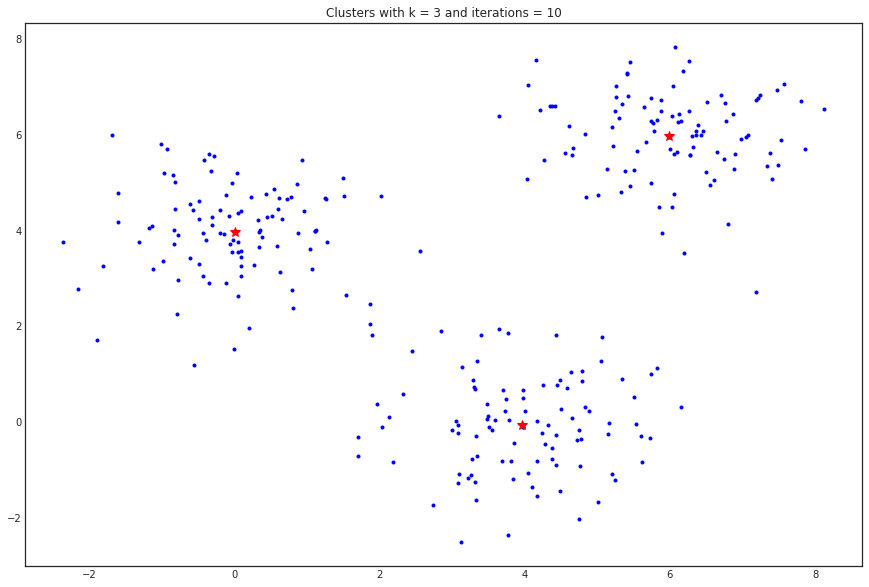

354.294900216
Iteration: 20
Centroids: 
[ 3.96445162 -0.06389417]
[ 0.00754038  3.95411625]
[ 5.990326    5.97262298]
Within Set Sum of Squared Error = 354.294900216


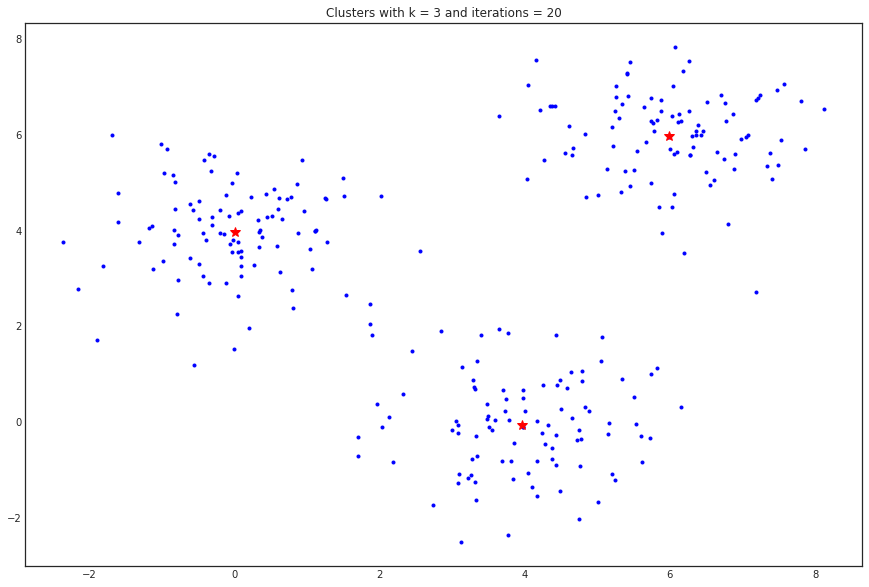

354.294900216
Iteration: 30
Centroids: 
[ 5.990326    5.97262298]
[ 0.00754038  3.95411625]
[ 3.96445162 -0.06389417]
Within Set Sum of Squared Error = 354.294900216


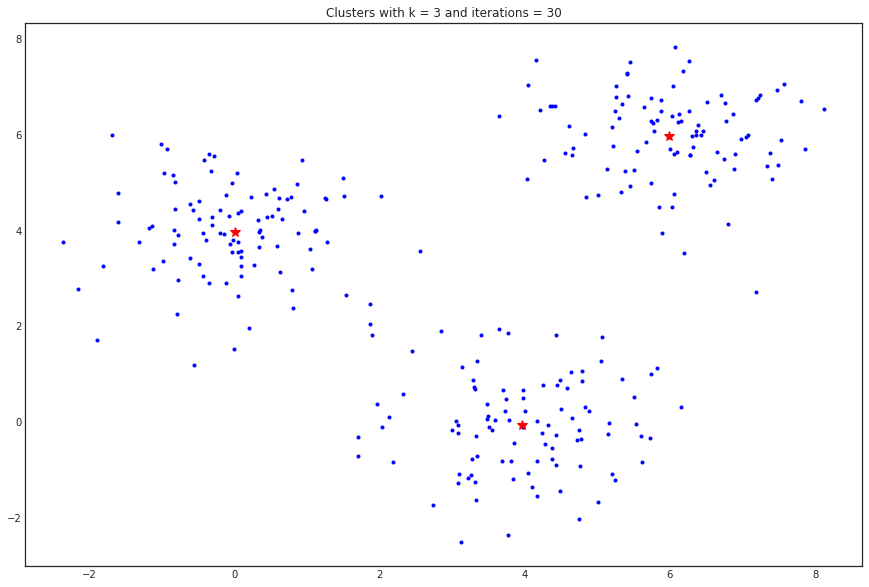

354.294900216
Iteration: 40
Centroids: 
[ 5.19393516  6.26861791]
[ 6.69655939  5.71013692]
[ 1.96621145  1.96520109]
Within Set Sum of Squared Error = 689.726105943


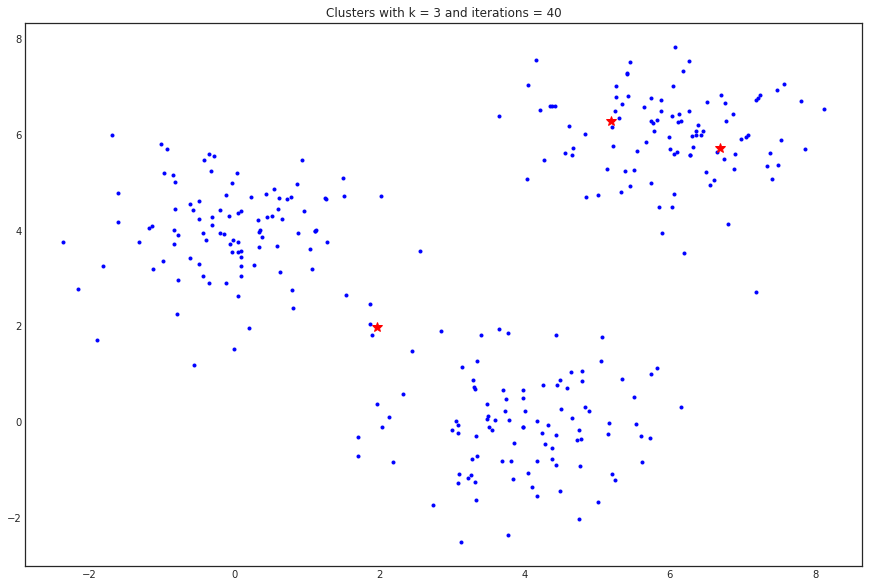

689.726105943
Iteration: 50
Centroids: 
[ 3.96445162 -0.06389417]
[ 5.990326    5.97262298]
[ 0.00754038  3.95411625]
Within Set Sum of Squared Error = 354.294900216


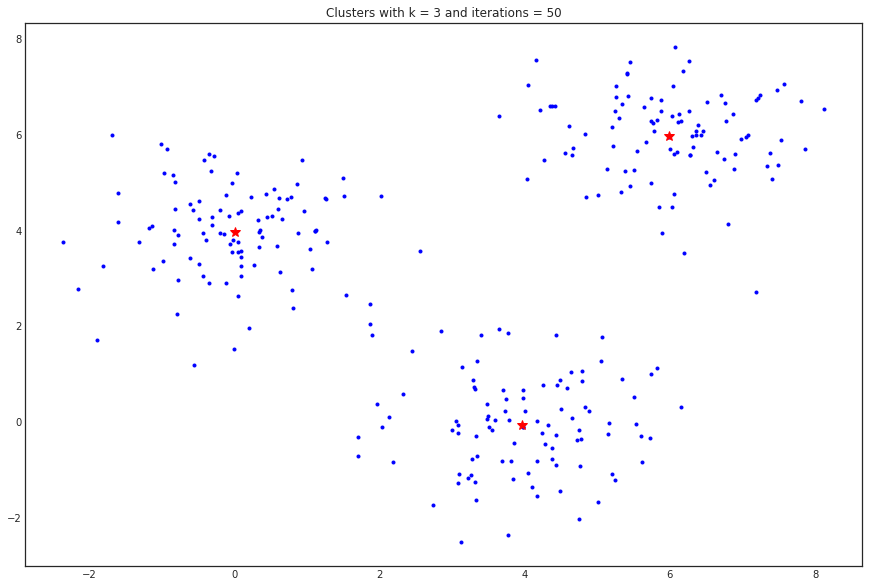

354.294900216
Iteration: 100
Centroids: 
[ 5.990326    5.97262298]
[ 3.96445162 -0.06389417]
[ 0.00754038  3.95411625]
Within Set Sum of Squared Error = 354.294900216


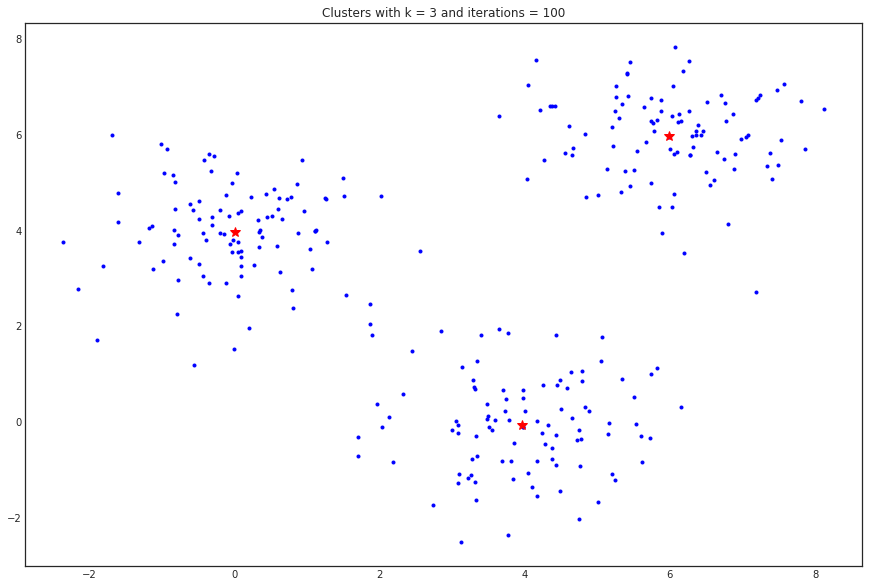

354.294900216


In [19]:
data = sc.textFile('data.csv')  
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))
values = []
k = 3
a_range = [1, 10, 20, 30, 40, 50, 100]


def homework(k, iter):
    
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, k, maxIterations=iter, initializationMode="random")

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print 'Iteration: ' + str(iter)
    print 'Centroids: '
    for centroid in clusters.centers:
        print centroid
    print 'Within Set Sum of Squared Error = ' + str(WSSSE)
    plot_iteration(k, iter, clusters.centers)
    
    return WSSSE


for i in a_range:
    print homework(k, i)
    
#print values

Iteration: 2
Centroids: 
[ 5.97822277  6.00568646]
[ 0.02606086  3.93311573]
[ 4.01790533 -0.05493179]
Within Set Sum of Squared Error = 354.375728937


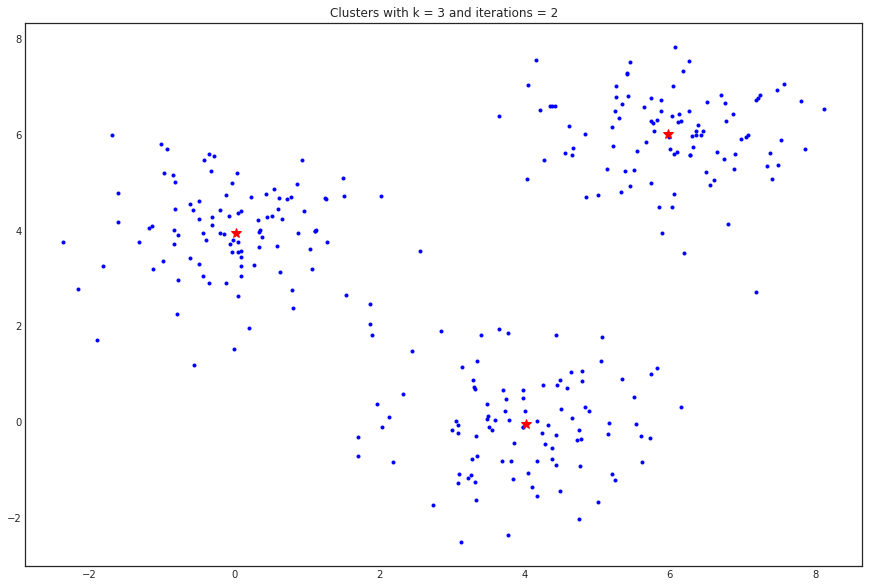

354.3757289371142

In [25]:
homework(3,2)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(a_range, values)
plt.show()

# HW10.4: KMeans Experiments

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW10.3. Explain any differences between the results in HW10.3 and HW10.4. 

In [ ]:
#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

In [ ]:
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").cache()
iter_num = 0
for i in range(10):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    if np.sum(np.absolute(centroids_new-centroids))<0.0001:
        break
    print "Iteration " + str(iter_num + 1)
    iter_num = iter_num + 1 
    centroids = centroids_new
    print centroids
    plot_iteration(K, i+1, centroids)
print "Final Results:"
print centroids

# HW10.4.1: Making Homegrown KMeans more efficient

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

In [ ]:
# START STUDENT CODE 10.4.1
# (ADD CELLS AS NEEDED)

# END STUDENT CODE 10.4.1

In [ ]:
%%time
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import *

#load data and convert to dense vectors for use with 
data = spark.read.format("csv").load("./data.csv")

data = data.select(*(col(c).cast("float").alias(c) for c in data.columns))
assembler = VectorAssembler(
  inputCols=["_c0","_c1"], outputCol="features"
)
assembled = assembler.transform(data)

kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(assembled.select("features"))

for centroid in model.clusterCenters():
    print centroid

plot_iteration(model.clusterCenters())

# HW10.5: OPTIONAL Weighted KMeans

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb), modify it to do a weighted KMeans and repeat the experiements in HW10.3. Explain  any differences between the results in HW10.3 and HW10.5.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

> weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of two values X1 and X2.

__[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [ ]:

def nearest_centroid(x):    
    norm = np.sqrt(sum(x**2))
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    # weight centroid
    return (closest_centroid_idx,(x/norm,1/norm))

def DistancetoCenter(p):
    return np.sqrt(np.sum((p-centroids)**2, axis=1).min())

K = 3
# Initialization
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").map(lambda line: np.array([float(x) for x in line.split(',')])).cache()
for i in range(200):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0]) 
    centroids_new = np.array([x[1][0]/x[1][1] for x in res]) 
    centroids = centroids_new
    if (i+1) in [1,10,20,100]:        
        print "\nIteration %d" %(i+1)     
        # print centroids
        plot_iteration(K, i+1, centroids)
        WSSSE = D.map(DistancetoCenter).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
print "\nFinal Results:"
print centroids

# HW10.6 OPTIONAL Linear Regression

Using [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb):


* Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

* Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots (e.g., plot MSE as a function of the number of iterations) and words. 


In [ ]:
import numpy as np
import csv
def data_generate(fileName, w=[0,0], size=100, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True
# model wegiht, true model y = 6x − 3.

w = [6,-3]
# training data
data_generate('data_train_10_6.csv', w, 100, 0)
data_generate('data_test_10_6.csv', w, 100, 1)

In [ ]:
# true model
x = [-4, 4]
y = [(i * w[0] + w[1]) for i in x]
# load data
with open('data_train_10_6.csv', 'r') as f:
    dataTrain = [[float(p) for p in line.split(',')] for line in f.readlines()]
with open('data_test_10_6.csv', 'r') as f:
    dataTest = [[float(p) for p in line.split(',')] for line in f.readlines()]

# plot the data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,20))
ax1.plot([k[1] for k in dataTrain], [k[0] for k in dataTrain], 'rx')
ax1.plot(x, y, linewidth=2.0)
ax1.set_title('Training Data')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax2.plot([k[1] for k in dataTest], [k[0] for k in dataTest], 'yx')
ax2.plot(x, y, linewidth=2.0)
ax2.set_title('Test Data')
ax2.set_xlabel('x')
ax2.grid()
plt.show()

In [ ]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from math import sqrt

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])


trainData = sc.textFile("data_train_10_6.csv").map(parsePoint)
testData = sc.textFile('data_test_10_6.csv').map(lambda l: [float(x) for x in l.split(',')])

# x-range
x = [-4, 4]
#w = truew
y = [(i * w[0] + w[1]) for i in x]
plt.figure(figsize=(15,10))
plt.plot(x, y, 'b', label="True line", linewidth=4.0)

# Build the model
iterations = [1, 10, 20, 30, 40, 50]
linestyle = ['m--', 'r--', 'g--', 'y--', 'c--', 'k--']
weight = inter = 0
for it, ls in zip(iterations, linestyle):
    model = LinearRegressionWithSGD.train(trainData, intercept=True, iterations=it)
    weight, inter = model.weights[0], model.intercept
    y = [i*weight+inter for i in x]
    # evaluate prediction error
    rms = testData.map(lambda p: ((p[1]*weight+inter - p[0])**2, 1)).reduce(lambda a,b: (a[0]+b[0], a[1]+b[1]))
    print 'After %d iterations: model - %s, Error - %.4f' %(it, str([weight, inter]), sqrt(rms[0]/rms[1]))
    plt.plot(x, y, ls, label="After %d Iterations" %it, linewidth=2.0)
#print model

# display the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# HW10.6.1 OPTIONAL Linear Regression

In the notebook provided above, in the cell labeled "Gradient descent (regularization)".

* Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

* Using the data from HW10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

In [ ]:
import numpy as np

def LR_GDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen)
    else:
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        if regType == "Ridge":            
            wReg = 2*(wBroadcast.value[:-1]+[0])
        elif regType == "Lasso":
            wReg = np.array([np.sign(x) for x in wBroadcast.value[:-1]]+[0])
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    return w

In [ ]:
def ierationsPlot(fileName, truew, regT='Ridge', regP=0.01, learningR=0.05, iterStep=2):
    print 'Regulation type: %s, lambda: %.2f, learning rate: %.2f' %(regT, regP, learningR)
    x = [-4, 4]
    
    w = truew
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'b', label="True line", linewidth=4.0)
    
    data = sc.textFile(fileName).map(lambda line: [float(v) for v in line.split(',')]+[1.0]).cache()
    n = data.count()
    
    np.random.seed(400)
    w = np.random.normal(0,1,2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'r--', label="After 0 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 0 iterations: " + str(squared_error/n)
    
    
    w = LR_GDReg(data, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'g--', label="After %d Iterations" %iterStep, linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(iterStep, squared_error/n)
    
    w = LR_GDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'm--', label="After %d Iterations" %(2*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(2*iterStep, squared_error/n)
    
    w = LR_GDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'y--', label="After %d Iterations" %(3*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(3*iterStep, squared_error/n)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

In [ ]:

ierationsPlot('data_train_10_6.csv', [6, -3], regP=0.01, regT='Ridge', learningR=0.05, iterStep=3)

In [ ]:
ierationsPlot('data_train_10_6.csv', [6, -3], regP=0.01, regT='Lasso', learningR=0.05, iterStep=3)


# HW10.7 OPTIONAL Error surfaces

Here is a link to R code with 1 test drivers that plots the linear regression model in  model space and in the domain space:

> https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0

Here is a sample output from this script: 
      
> https://www.dropbox.com/s/my3tnhxx7fr5qs0/image%20%281%29.png?dl=0

Please use this as inspiration and code a equivalent error surface and heatmap (with isolines) in Spark and show the trajectory of learning taken during gradient descent (after each n-iterations of Gradient Descent):


Using Spark and  Python (using the above R Script as inspiration), plot the error surface for the linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space for every 10th iteration.  Plot them side by side if possible  for each iteration: lefthand side plot is the model space(w0 and w01) and the righthand side plot is domain space (plot the corresponding model and training data in the problem domain space) with a final pair of graphs showing the entire trajectory in the model and domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, MSE on the training data etc.

Also plot the MSE as a function of each iteration (possibly every 10th iteration). Dont forget to label both axis and the graph also. __[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__





In [ ]:
# START STUDENT CODE 10.7
# (ADD CELLS AS NEEDED)

# END STUDENT CODE 10.7